<a href="https://colab.research.google.com/github/435wldms/essa/blob/main/20231006_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 텍스트 분석 이해

* 텍스트 분석: 비정형 데이터 분석 -> 비정형 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미있는 값을 부여하는가가 중요함
* 피처 벡터화(추출) : 텍스트를 word 기반의 다수 피처로 추출, 빈도수를 숫자 값으로 부여하여 벡터값으로 표현

**텍스트 분석 수행 프로세스**
* 텍스트 사전 준비작업(전처리) -> 피처 벡터화/추출(bow, word2vec가 대표적) -> ML 모델 수립 및 학습/예측/평가

**파이썬 기반의 NLP, 텍스트 분석 패키지**

* Genism과 SpaCy가 자주 활용되는 패키지\
* 사이킷런으로도 텍스트 분석이 가능하지만 특화된 라이브러리는 가지고 있지 않아 위와 같은 패키지와 결합해 사용하는 경우가 많음

# 02 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

* 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등의 사전 작업을 수행하는 것
* 클렌징: 불필요한 문자, 기호 등을 제거
* 텍스트 토큰화: 문서에서 문장을 분리하는 문장 토큰화, 문장에서 단어를 토큰으로 분리하는 단어 토큰화


1) 문장 토큰화
>
문장의 마지막 기호에 따라 분리하는 것이 일반적 -> sent_tokenize를 이용해 토큰화 수행

In [4]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)

print(type(sentences), len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


-> 문장으로 구성된 list 객체 반환

2) 단어 토큰화

문장을 분리하는 구분자를 이용해 문장을 단어로 토큰화하는 것 -> word_tokenize()를 이용

In [5]:
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


* sent_tokenize, word_tokenize를 조합해 문서에 대한 단어 토큰화 진행
* 문서를 문장으로, 개별 문장을 단어로 토큰화하는 tokenize_text() 함수 생성

In [6]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장 별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
  # 문장 별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장 별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


-> 3개의 리스트 객체를 내포하는데, 각 객체는 문장 별로 토큰화된 단어를 요소로 가짐
>
* 문맥적인 의미도 무시하지 않고자 도입된 것 : n-gram
* n-gram: 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 냄

**스톱 워드 제거**

* 스톱 워드: 분석에 큰 의미가 없는 단어
* 필수 문법 요소지만 문맥적으로 큰 의미가 없는 단어를 말하는데, 제거하지 않으면 빈번함으로 인해 오히려 중요한 단어로 인지될 수 있어 위험

* 언어별로 스톱 워드가 목록화되어 있음

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


-> 총 스톱 워드: 179개

* 3개의 문장을 토큰화해 생성한 word_tokens 리스트에 대해 stopwords 제거하여 의미 있는 단어 추출

In [7]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장 별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words = []
  # 개별 문장 별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환합니다.
    word=word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


**Stemming과 Lemmatization**

* 문법적인 요소에 따라 형태가 달라지는 단어의 원형을 찾는 것
* 둘 다 유사한 역할을 하지만 Stemming이 더 정확한 철자로 된 어근 단어를 찾아줌 + 시간이 더 오래 걸림
* stemmer: porter, lancaster, snowball stemmer 등
* lemmatization: WordNetLemmatizer를 제공
* stemmer 객체를 생성한 뒤 stem('단어') 메서드를 호출해 단어의 stemming 작업 가능

In [8]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


-> work는 단순 변화이므로 제대로 인식하지만 amuse는 e를 빼고 인식하고, happy와 fancy도 비교형, 최상급형으로 변형된 단어의 정확한 원형을 찾지 못함
>
* Lemmatization을 수행, 품사를 입력해주어야 함

In [9]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

amuse amuse amuse
happy happy
fancy fancy


-> 더 정확하게 원형 단어를 추출해 줌

# 03 Bag of Words - BOW

* 문서가 가지는 모든 단어를 문맥, 순서를 무시하고 일괄적으로 빈도 값을 부여해 피처 값을 추출하는 모델
* 문장에 있는 모든 단어에서 중복을 제거하고 단어를 칼럼 형태로 나열, 문장에서 단어가 나타나는 횟수를 인덱스에 기재
* 장점: 쉽고 빠른 구축
* 단점: 문맥 의미 반영 부족, 희소 행렬 문제

**BOW 피처 벡터화**

* 텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력할 수 없음 -> 특정 의미를 가지는 숫자형 값인 벡터로 변환해야 함 (피처 벡터화)
* 텍스트를 단어로 추출해 피처로 할당, 발생 빈도와 같은 값을 이 피처에 값으로 부여해 단어 피처의 발생 빈도 값으로 구성된 벡터 만들기
* bow 모델에서 피처 벡터화를 수행하는 것은 모든 문서에서 모든 단어를 칼럼 형태로 나열, 해당 단어의 횟수나 정규화된 빈도를 값으로 부여


* BOW 피처 벡터화: 카운트 기반 벡터화, tf-idf(term-frequency) 기반 벡터화
* count 벡터화에서는 카운트 값이 높을수록 중요한 단어로 인식됨 -> 문서의 특징 뿐만 아니라 문장에서 자주 자용되는 단어까지 높은 값을 가지게 됨
* tf-idf 벡터화는 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에는 페널티를 부여

**사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer**

* countvectorizer는 단지 피처 벡터화만 수행하지는 않고, 소문자 일괄 변환, 토큰화 등 전처리도 함께 수행
* 파라미터: max_df- 너무 높은 빈도수를 가지는 단어 제외, min_df- 너무 낮은 빈도수를 가지는 단어 제외, max_features- 피처의 개수 제한, stop_words, n_gram_range, analyzer, token_pattern, tokenizer, ..
* 모든 문자를 소문자로 변경, n_gram_range를 반영해 각 단어 토큰화, 텍스트 정규화 수행, tokenizer 파라미터에 커스텀 어근 변환 함수 적용, max_df, min_df 등 단어 빈도수 벡터값 적용

**BOW 벡터화를 위한 희소 행렬**

* 희소 행렬: 문서에 있는 단어를 추출해 행렬화하였을 때 대부분의 값을 0이 차지하는 행렬
* 희소 행렬은 불필요한 0값이 메모리 공간을 많이 차지하고, 데이터 액세스를 위한 시간이 많이 소모됨
-> 적은 메모리 공간을 차지하도록 변환(C00, CSR 형식)

**희소 행렬 - COO 형식**

* 0이 아닌 데이터만 별도의 데이터 배열에 저장하고 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식
* Scipy의 sparse를 이용해 희소 행렬 변환 수행

In [11]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

In [14]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [15]:
# toarray 메서드를 이용해 밀집 형태의 행렬로 다시 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

**희소 행렬 - CSR 형식**

* COO 방식은 위치를 순서대로 표시하므로 같은 값이 연속해서 나오게 됨 -> 이렇게 반복되는 것을 제거하기 위해 위치의 위치를 표기함
* 고유 값의 시작 위치만 알면 얼마든지 행 위치 배열을 다시 만들 수 있어 메모리가 적게 들고 빠른 연산이 가능함

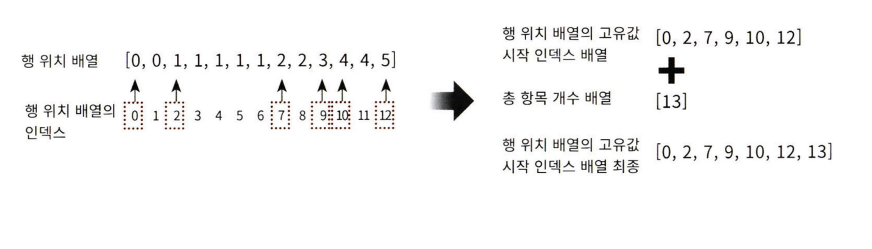

* CSR matrix를 이용해 csr 변환이 쉽게 가능

In [17]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])
# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CRS 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


* 실제 사용 시에는 밀집 행렬을 생성 파라미터로 입력하면 coo나 csr 희소 행렬로 생성

In [18]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

* countvectorizer나 TfidfVectorizer 클래스로 변환된 피처화 벡터, 행렬은 모두 csr 형태